# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

## 特徴量の確認

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

1)age
2)sex
3)bmi
4)bp
5)s1
6)s2
7)s3
8)s4
9)s5
10)s6

1)年齢

2)性別

3)BMI

4)平均血圧

5)T細胞
総コレステロール？

6)低密度リポタンパク質
以前は悪玉コレステロール

7)高密度リポタンパク質
以前は善玉コレステロール

8)甲状腺刺激ホルモン
新陳代謝を盛んにする

9)ラモトリギン
薬？

10)血糖値

参照
https://scikit-learn.org/dev/datasets/index.html#diabetes-dataset

## 目的変数の確認

In [6]:
diabetes_target=diabetes.target#ベースラインから1年経過したときの糖尿病の進行度

# 仮説を立てる

糖尿病について調べると，食べ過ぎ・肥満・加齢などの要因があげられていた

血糖値が高いと糖尿病

仮説：目的変数が進行度を指しているので，現在の血糖値が高いか低いかにかかわらず，BMIや年齢がかかわっている．また，総コレステロールが高いあるいは新陳代謝が悪いと肥満になりやすいので，甲状腺刺激ホルモンとBMI，総コレステロールとBMIに相関があり，どれも進行に影響を与える．

# データの分析

In [7]:
feature_list=["age","sex","bmi","bp","tc","ldl","hdl","tch","ltg","glu"]

In [8]:
diabetes_df=pd.DataFrame(diabetes.data,columns=feature_list)

In [9]:
diabetes_df['target']=diabetes.target

In [10]:
diabetes_df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
diabetes_df.describe()#すでに標準化されている

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


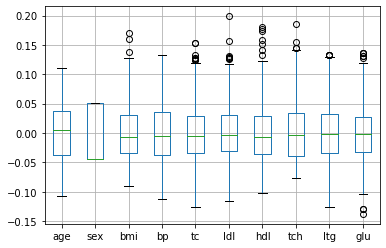

In [12]:
diabetes_df[[c for c in diabetes_df.columns if c != "target"]].boxplot()

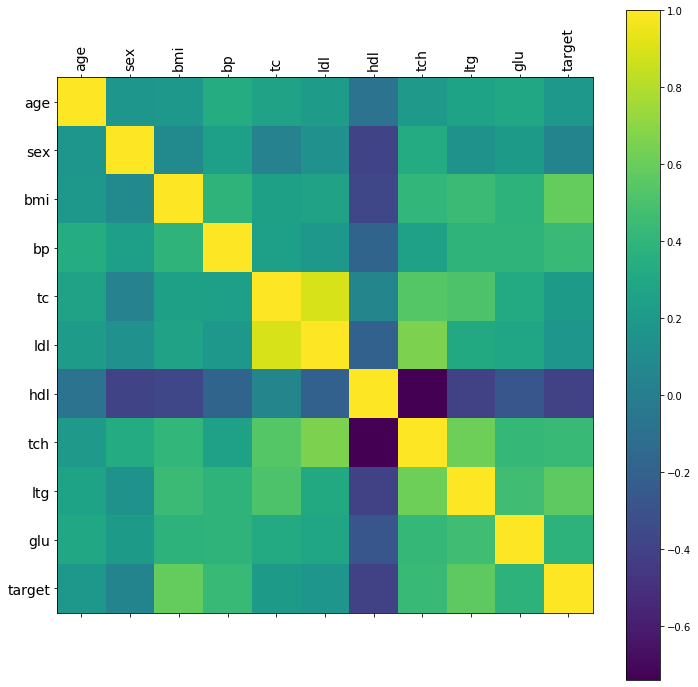

In [13]:
fig = plt.figure(figsize=(12, 12))
plt.matshow(diabetes_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(diabetes_df.shape[1]),diabetes_df.columns, fontsize=14, rotation=90)
plt.yticks(range(diabetes_df.shape[1]), diabetes_df.columns, fontsize=14)
plt.colorbar()

In [14]:
# どういう組み合わせで相関が大きいか見ておきましょう（0.4はなんとなくです．根拠はありません）
corr = diabetes_df.corr().values
[[diabetes_df.columns[i], diabetes_df.columns[j], corr[i][j]] for i in range(diabetes_df.shape[1]) for j in range(diabetes_df.shape[1]) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1]

[['bmi', 'tch', 0.41380660183144097],
 ['bmi', 'ltg', 0.44615864824665014],
 ['bmi', 'target', 0.586450134474689],
 ['bp', 'target', 0.44148384893088644],
 ['tc', 'ldl', 0.8966629578104909],
 ['tc', 'tch', 0.5422072805232405],
 ['tc', 'ltg', 0.5155007619334616],
 ['ldl', 'tc', 0.8966629578104909],
 ['ldl', 'tch', 0.6598168886666449],
 ['hdl', 'tch', -0.7384927292583836],
 ['tch', 'bmi', 0.41380660183144097],
 ['tch', 'tc', 0.5422072805232405],
 ['tch', 'ldl', 0.6598168886666449],
 ['tch', 'hdl', -0.7384927292583836],
 ['tch', 'ltg', 0.6178573917374464],
 ['tch', 'glu', 0.4172121137122003],
 ['tch', 'target', 0.4304528847447729],
 ['ltg', 'bmi', 0.44615864824665014],
 ['ltg', 'tc', 0.5155007619334616],
 ['ltg', 'tch', 0.6178573917374464],
 ['ltg', 'glu', 0.4646704561386913],
 ['ltg', 'target', 0.5658834252428101],
 ['glu', 'tch', 0.4172121137122003],
 ['glu', 'ltg', 0.4646704561386913],
 ['target', 'bmi', 0.586450134474689],
 ['target', 'bp', 0.44148384893088644],
 ['target', 'tch', 0.4

総コレステロールと低密度リポタンパク質は正の相関，
高密度リポタンパク質と甲状腺刺激ホルモンは負の相関が強い

目的変数はBMI,ラモトリギンとの相関が高い

年齢はあまり関係なさそう

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df[feature_list], diabetes_df["target"], test_size=0.33, random_state=1)

In [17]:
X_train.shape, X_test.shape

((296, 10), (146, 10))

# 予測, 精度の確認

##  回帰分析

In [18]:
# 線形モデル
from sklearn import linear_model

In [19]:
clf = linear_model.LinearRegression()
X = diabetes_df["tc"].values.reshape(-1, 1)
Y = diabetes_df["ldl"]
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y)

(array([0.89666296]), 2.111932209837373e-16, 0.8040044599094561)

Text(0, 0.5, 'ldl')

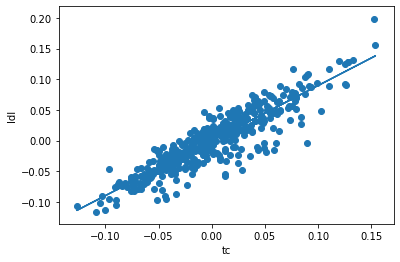

In [21]:
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("tc")
plt.ylabel("ldl")

総コレステロールと悪玉コレステロールはかなり相関がある

Text(0, 0.5, 'tch')

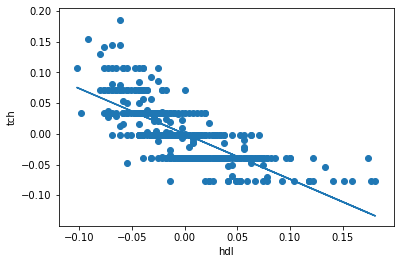

In [22]:
clf = linear_model.LinearRegression()
X = diabetes_df["hdl"].values.reshape(-1, 1)
Y = diabetes_df["tch"]
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("hdl")
plt.ylabel("tch")

In [23]:
clf.coef_, clf.intercept_, clf.score(X, Y)

(array([-0.73849273]), 4.927147451667704e-17, 0.5453715111674953)

善玉コレステロールと甲状腺刺激ホルモンに相関があるとは言いがたい

Text(0, 0.5, 'tc')

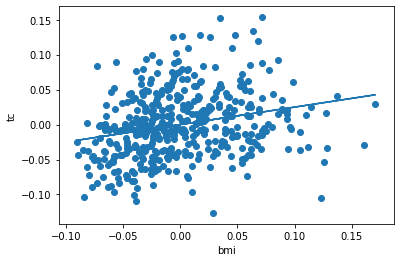

In [24]:
clf = linear_model.LinearRegression()
X = diabetes_df["bmi"].values.reshape(-1, 1)
Y = diabetes_df["tc"]
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("bmi")
plt.ylabel("tc")

In [25]:
clf.coef_, clf.intercept_, clf.score(X, Y)

(array([0.24977742]), 1.0974500947748437e-16, 0.0623887604122868)

Text(0, 0.5, 'hdl')

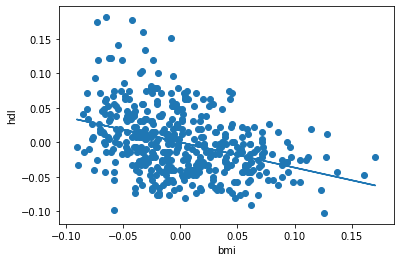

In [26]:
clf = linear_model.LinearRegression()
X = diabetes_df["bmi"].values.reshape(-1, 1)
Y = diabetes_df["hdl"]
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("bmi")
plt.ylabel("hdl")

BMIとコレステロール類には相関がない

Text(0, 0.5, 'tch')

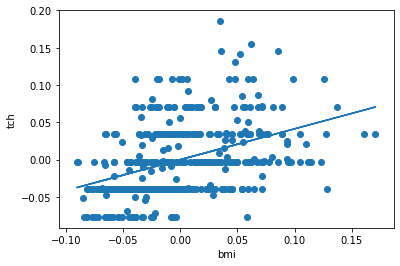

In [27]:
clf = linear_model.LinearRegression()
X = diabetes_df["bmi"].values.reshape(-1, 1)
Y = diabetes_df["tch"]
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("bmi")
plt.ylabel("tch")

In [28]:
clf.coef_, clf.intercept_, clf.score(X, Y)

(array([0.4138066]), 7.179400269718152e-16, 0.17123590371928443)

BMIと甲状腺刺激ホルモンは相関がない

甲状腺刺激ホルモンは基本的に離散値のようなものになっていた

# ここから訓練とテストを分けて予測

Text(0, 0.5, 'target')

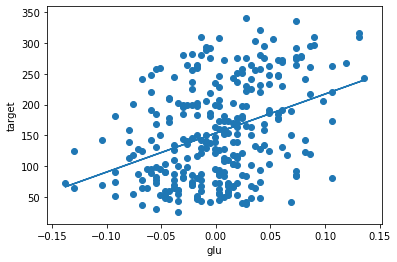

In [29]:
clf = linear_model.LinearRegression()
X = X_train["glu"].values.reshape(-1, 1)
Y = y_train
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("glu")
plt.ylabel("target")

In [30]:
clf.coef_, clf.intercept_, clf.score(X_test["glu"].values.reshape(-1, 1), y_test)

(array([633.77195413]), 153.77622416120772, 0.13323391080161406)

↑糖尿病は血糖値の高さで判断するが，進行具合は血糖値ではわからない

Text(0, 0.5, 'target')

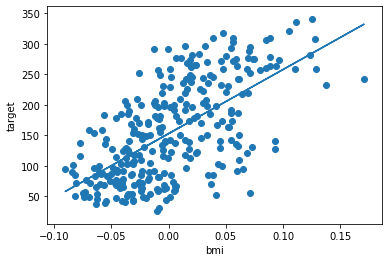

In [31]:
clf = linear_model.LinearRegression()
X = X_train["bmi"].values.reshape(-1, 1)
Y = y_train
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("bmi")
plt.ylabel("target")

In [32]:
clf.coef_, clf.intercept_, clf.score(X_test["bmi"].values.reshape(-1, 1), y_test)

(array([1051.26255398]), 152.67420172425446, 0.17726883029983176)

↑BMIでの予測もかなり厳しい

(array([336.40265447]), 154.78773114904448, 0.03684076449698748)

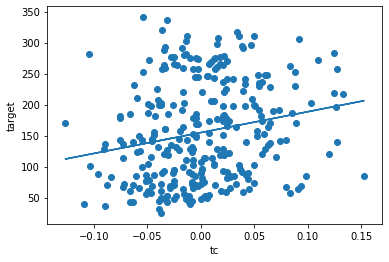

In [33]:
clf = linear_model.LinearRegression()
X = X_train["tc"].values.reshape(-1, 1)
Y = y_train
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("tc")
plt.ylabel("target")

clf.coef_, clf.intercept_, clf.score(X_test["tc"].values.reshape(-1, 1), y_test)

(array([730.39876992]), 155.04843809462037, 0.14879961467841207)

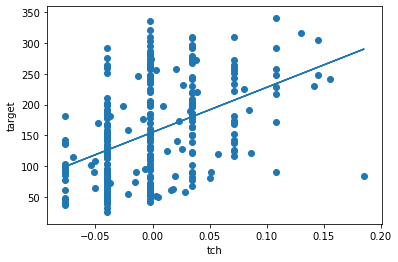

In [34]:
clf = linear_model.LinearRegression()
X = X_train["tch"].values.reshape(-1, 1)
Y = y_train
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("tch")
plt.ylabel("target")

clf.coef_, clf.intercept_, clf.score(X_test["tch"].values.reshape(-1, 1), y_test)

↑総コレステロールも甲状腺刺激ホルモンも厳しい

Text(0, 0.5, 'target')

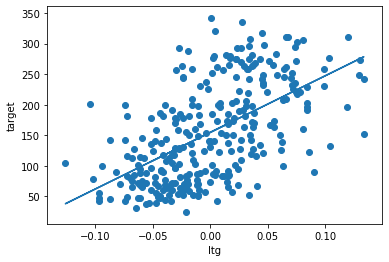

In [35]:
clf = linear_model.LinearRegression()
X = X_train["ltg"].values.reshape(-1, 1)
Y = y_train
clf.fit(X, Y)

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("ltg")
plt.ylabel("target")

In [36]:
clf.coef_, clf.intercept_, clf.score(X_test["ltg"].values.reshape(-1, 1), y_test)

(array([925.74343425]), 154.7124558190637, 0.2867619265146587)

↑ラモトリギンではBMIよりはよくなったがこれでもかなり低い

In [37]:
clf = linear_model.LinearRegression()
X = X_train[["tch","bmi","tc","age"]].values
Y = y_train
clf.fit(X, Y)

clf.coef_, clf.intercept_, clf.score(X_test[["tch","bmi","tc","age"]].values, y_test)

(array([381.06502541, 889.95133028, -79.18651381,  96.73257215]),
 153.03209688887443,
 0.2429449469211443)

↑年齢，BMI，総コレステロール，甲状腺刺激ホルモンが進行度の予測に使えると思ったが，ラモトリギンよりも悪くなってしまった

In [38]:
clf = linear_model.LinearRegression()
X = X_train
Y = y_train
clf.fit(X, Y)

clf.coef_, clf.intercept_, clf.score(X_test, y_test)

(array([ -14.6944181 , -245.02259156,  613.91038683,  310.47859338,
        -716.97966491,  395.61349832,  122.26412367,  217.58392863,
         690.2289183 ,   62.65347874]),
 152.60099512020548,
 0.4384848789167007)

↑すべて使うと一番よくなった

回帰係数の値が一番大きくなったのはラモトリギン

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

仮説：目的変数が進行度を指しているので，現在の血糖値が高いか低いかにかかわらず，BMIや年齢がかかわっている．また，総コレステロールが高いあるいは新陳代謝が悪いと肥満になりやすいので，甲状腺刺激ホルモンとBMI，総コレステロールとBMIに相関があり，どれも進行に影響を与える．

・重回帰分析を行ったところ，血糖値は説明変数の重要度として高くなかった（仮定どおり）

・年齢は関係なく，BMIは少し重要であることが分かった．

・BMIと甲状腺刺激ホルモン，総コレステロールには相関があると考えたが，そのような傾向は見られなかった．

・一番重要であったのはラモトリギンだった（調べても薬としか出てこず，なぜ重要となったかはわからなかった）